**Import necessary Libraries**

In [1]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

**Load any image**

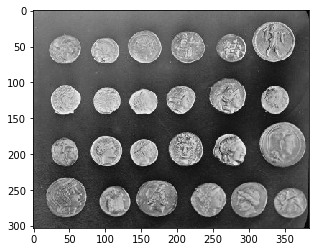

In [2]:
# skimage.data has a lot of sample images to play around with
image = data.coins()

plt.imshow(image, cmap='gray')


**Import utilities needed for convolution**

In [3]:
from scipy.signal import convolve2d

**Find the 5X5 Guassian Blur kernel with sigma = 1.0 and convolve the above image with that kernel**


*Hint: You can create various Guassian kernel at http://dev.theomader.com/gaussian-kernel-calculator/*

In [4]:
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.023792,0.094907,0.150342,0.094907,0.023792],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.003765,0.015019,0.023792,0.015019,0.003765]])

**Convole the guassian kernel with the image and use 'valid' convolution and show the result side by side**

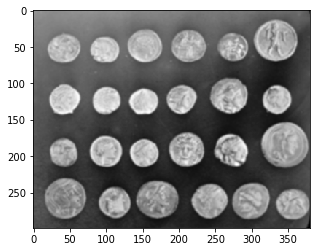

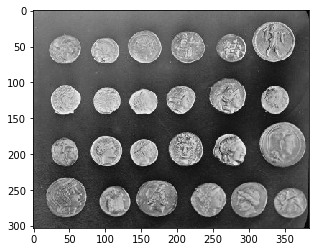

In [5]:
blurred_image = convolve2d(image, kernel, mode = 'valid')
plt.imshow(blurred_image,cmap='gray')
plt.show()
plt.imshow(image,cmap='gray')


<h1>Build a CNN to classify 10 monkey species</h1>

**Mounting Google Drive on to the Google Colab instance**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

**Set the appropriate path for the datsaet zip provided**

In [7]:
images_path = "monkeys_dataset.zip"

**Extracting the dataset.zip to the present working directory**

In [8]:
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
    zip.extractall()

*Check the list of files in the pwd(present working directory) by running command 'ls' and ensure 'dataset' folder has been generated*

In [9]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


**Importing required Keras modules**

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

Using TensorFlow backend.


**Build a Sequential CNN classifier with input shape as 64X64 and using three sets of Convoltutional + Pooling layers. You can additionally use Dropout in the fully connected layers. Make sure the final layer shape matches with the number of classes**

In [11]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 10, activation = 'softmax'))

**Compile the CNN classifier with Adam optimizer (default Learning rate and other parameters)
and Categorical Crossentropy as loss function and Accuracy as the metric to monitor**

*Optionally you can use an optimizer with custom learning rate and passing it to the optimizer parameter of compile*

*Eg: keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)*

In [12]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Use ImageDataGenerator to create a test and training set data generators and use fit_generator() function to train the model**

*ImageDataGenerator is a powerful preprocessing utility to generate training and 
testing data with common data augmentation techniques. It can also be used to  
generate training data from Images stored in hierarchical directory structures
For more options of ImageDataGenerator go to https://keras.io/preprocessing/image/*

In [13]:
from keras.preprocessing.image import ImageDataGenerator


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images

training_set = train_datagen.flow_from_directory('./dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('./dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# There are 1098 training images and 272 test images in total
classifier.fit_generator(training_set,
                         steps_per_epoch = int(1098/32),
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = int(272/32))


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/10
34/34 [==============================] - 52s 2s/step - loss: 2.2976 - accuracy: 0.1248 - val_loss: 2.2668 - val_accuracy: 0.1992
Epoch 2/10
34/34 [==============================] - 43s 1s/step - loss: 2.1101 - accuracy: 0.2326 - val_loss: 2.0107 - val_accuracy: 0.2750
Epoch 3/10
34/34 [==============================] - 38s 1s/step - loss: 1.7875 - accuracy: 0.3527 - val_loss: 1.5139 - val_accuracy: 0.4417
Epoch 4/10
34/34 [==============================] - 38s 1s/step - loss: 1.5523 - accuracy: 0.4371 - val_loss: 1.3370 - val_accuracy: 0.4917
Epoch 5/10
34/34 [==============================] - 38s 1s/step - loss: 1.3820 - accuracy: 0.5119 - val_loss: 1.5673 - val_accuracy: 0.5125
Epoch 6/10
34/34 [==============================] - 36s 1s/step - loss: 1.2521 - accuracy: 0.5268 - val_loss: 1.3922 - val_accuracy: 0.5083
Epoch 7/10
34/34 [==============================] - 33s 979ms/step - loss: 

**save the model and its weights**

In [14]:
classifier.save('./classifier.h5')

classifier.save_weights('./classifier_weights.h5')

*Check the current directory if the weights have been saved*

In [15]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


<h2>Testing the model</h2>

**Load the pre-trained saved model and load the weights**

In [16]:

from keras.models import load_model
import numpy as np
from keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('./classifier.h5')
pretrained_model.load_weights('./classifier_weights.h5')

In [27]:
import cv2
test_image = cv2.imread('download.jpg')


# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)
test_image =test_image*1/255.0
print(test_image.shape)

(225, 225, 3)
(1, 225, 225, 3)
(1, 225, 225, 3)


**Test the model on one single image from the test folders**

In [32]:
import cv2
test_image = cv2.imread('download.jpg')
test_image = cv2.resize(test_image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)
test_image =test_image*1/255.0
print(test_image.shape)


#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = classifier.predict(test_image)
print(result,"result")
# Check the indices Image Data Generator has allotted to each folder
classes_dict = training_set.class_indices
print(classes_dict)

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in classes_dict.items():
    prediction_class.append(class_name)
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(prediction_class[predicted_index])

(64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
After expand_dims: (1, 64, 64, 3)
[[5.6428139e-06 9.9535698e-01 6.2903141e-06 1.3424143e-04 5.6888117e-04
  1.6531612e-04 3.5906769e-03 1.0096756e-04 1.7815699e-05 5.3224234e-05]] result
{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}
[5.6428139e-06 9.9535698e-01 6.2903141e-06 1.3424143e-04 5.6888117e-04
 1.6531612e-04 3.5906769e-03 1.0096756e-04 1.7815699e-05 5.3224234e-05]
n1


**Generating a report on the test data**

In [34]:
# Re-initalizing the test data generator with shuffle=False to create the confusion matrix
test_set = test_datagen.flow_from_directory('./dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

# Predict the whole generator to get predictions
Y_pred = classifier.predict_generator(test_set, int(10000/32+1))

# Find out the predictions classes with maximum probability
y_pred = np.argmax(Y_pred, axis=1)

# Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Printing the confusion matrix based on the actual data vs predicted data. 
print(confusion_matrix(test_set.classes, y_pred))

# Printing the classification report
print(classification_report(test_set.classes, y_pred, target_names=prediction_class))

Found 272 images belonging to 10 classes.


ValueError: Found input variables with inconsistent numbers of samples: [272, 9472]

**Play around with the model by adding regularization to the layers, adding more convolutional layers, etc., to improve the testing accuracy**